In [92]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [93]:
# CSV dosyasından veri setini yükle
data = pd.read_csv("DATA/Iris.csv")

In [94]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [95]:
# Veri setinden özellikleri ve etiketleri ayır
X = data.drop('Species', axis=1).values
y = data['Species'].values

In [96]:
# Özellikleri standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [97]:
# Diana kümeleme algoritması
def diana(X, k):
    n = X.shape[0]  # Veri noktalarının sayısı
    clusters = [[i] for i in range(n)]  # Başlangıçta her veri noktası bir küme

    while len(clusters) > k:
        max_dist = -1
        merge_i = -1
        merge_j = -1

        # En büyük mesafeyi bul
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = np.linalg.norm(np.mean(X[clusters[i]], axis=0) - np.mean(X[clusters[j]], axis=0))
                if dist > max_dist:
                    max_dist = dist
                    merge_i = i
                    merge_j = j

        # İki kümenin birleştirilmesi
        clusters[merge_i].extend(clusters[merge_j])
        del clusters[merge_j]

    return clusters

In [98]:
# Kümeleme sonuçlarını görselleştirme
def visualize_clusters(X, clusters):
    # Her küme için farklı renkler
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for i, cluster in enumerate(clusters):
        cluster_points = X[cluster]
        plt.scatter(cluster_points[:, 3], cluster_points[:, 4], c=colors[i], label=f'Cluster {i+1}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Diana Clustering')
    plt.legend()
    plt.show()

In [99]:
# Diana kümeleme
k = 3  # Küme sayısı
clusters = diana(X_scaled, k)

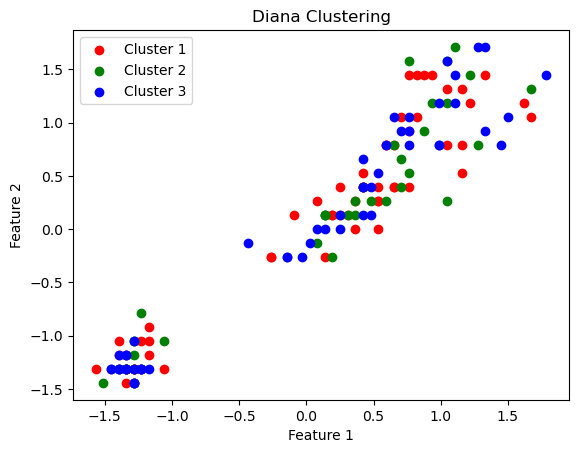

In [100]:
visualize_clusters(X_scaled, clusters)

In [105]:
# Gerçek etiketlerin yüklenmesi
true_labels = data['Species']

In [106]:
# Dönüştürme işlemi gerekebilir (Sınıfları numerik değerlere dönüştürmek)
# Bu örnek için her bir sınıfın ismi bir numerik değerle eşleştirilmiş olsun.
# Örneğin: "Iris-setosa" -> 0, "Iris-versicolor" -> 1, "Iris-virginica" -> 2
true_labels.replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}, inplace=True)

In [107]:
# Kümeleme sonuçlarının indekslerini yeniden düzenleme
cluster_labels = np.zeros_like(true_labels)
for i, cluster in enumerate(clusters):
    for point_idx in cluster:
        cluster_labels[point_idx] = i

In [108]:
# Ortalama Kare Hatasının hesaplanması
mse = mean_squared_error(true_labels, cluster_labels)
print("Ortalama Kare Hatası:", mse)

Ortalama Kare Hatası: 1.4
